In [1]:
#import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import metrics
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

In [6]:
#Call Datasets
Data1 = pd.read_csv("archive/1- mental-illnesses-prevalence.csv")
Data2 = pd.read_csv("archive/4- adult-population-covered-in-primary-data-on-the-prevalence-of-mental-illnesses.csv")
Data3 = pd.read_csv("archive/6- depressive-symptoms-across-us-population.csv")
Data4 = pd.read_csv("archive/7- number-of-countries-with-primary-data-on-prevalence-of-mental-illnesses-in-the-global-burden-of-disease-study.csv")

df1 = pd.DataFrame(Data1)
df2 = pd.DataFrame(Data2)
df3 = pd.DataFrame(Data3)
df4 = pd.DataFrame(Data4)

In [9]:
#Describe of All Datasets
def describe(df):
    
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing value': missing
    })    
        
    return output


class color:
   BLUE = '\033[94m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [23]:
#Output BEFORE FILTER FOR UNITED STATES 
print(color.BOLD + color.BLUE +
      '"Mental illness dataframe"' + color.END)
print(describe(df1))
print("\n")
print(color.BOLD + color.BLUE +
      '"Adult population | mental illnesses"' + color.END)
print(describe(df2))
print("\n")
print(color.BOLD + color.BLUE +
      '"Depressive"' + color.END)
print(describe(df3))
print("\n")
print(color.BOLD + color.BLUE +
      '"Number of countries"' + color.END)
print(describe(df4))

"Mental illness dataframe"
                                            variable    dtype  count  unique  \
0                                             Entity   object   6420     214   
1                                               Code   object   6420     206   
2                                               Year    int64   6420      30   
3  Schizophrenia disorders (share of population) ...  float64   6420    6406   
4  Depressive disorders (share of population) - S...  float64   6420    6416   
5  Anxiety disorders (share of population) - Sex:...  float64   6420    6417   
6  Bipolar disorders (share of population) - Sex:...  float64   6420    6385   
7  Eating disorders (share of population) - Sex: ...  float64   6420    6417   

   missing value  
0              0  
1            270  
2              0  
3              0  
4              0  
5              0  
6              0  
7              0  


"Adult population | mental illnesses"
            variable    dtype  count  uni

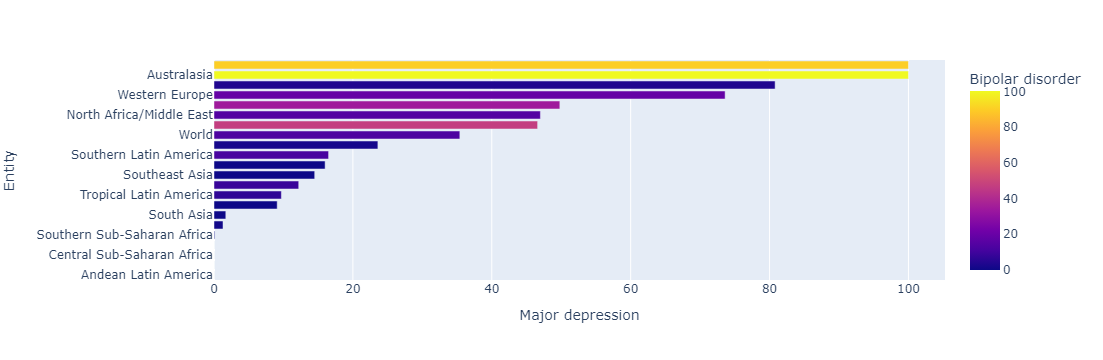

<Figure size 1280x960 with 0 Axes>

In [22]:
#Visualizations 

df2.sort_values(by= "Major depression" ,inplace=True)
plt.figure(dpi=200)
fig = px.bar(df2, x="Major depression", y="Entity", orientation='h',color='Bipolar disorder')
fig.show()

In [24]:
# Sample data
data = {
    'Country': ['United States', 'Canada', 'United States', 'Mexico'],
    'Value': [100, 200, 150, 300]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Filtering for United States
us_data = df[df['Country'] == 'United States']

# Displaying the filtered data
print(us_data)

         Country  Value
0  United States    100
2  United States    150


In [25]:

# Filtering the data for years 1990 to 2019
df = df[(df['Year'] >= 1990) & (df['Year'] <= 2019)]

# Pivoting the data
pivot_df = df.pivot(index='Year', columns='Disorder', values='Prevalence')

# Calculating correlation with years
correlations = pivot_df.corrwith(pivot_df.index)

# Filtering positive correlations
positive_correlations = correlations[correlations > 0]

# Plotting
positive_correlations.plot(kind='bar', title='Disorders with Positive Correlation with Years Passed (1990-2019)')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Disorder')
plt.show()

KeyError: 'Year'